In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv(r"C:\Users\HP\Downloads\Customers.csv")
products = pd.read_csv(r"C:\Users\HP\Downloads\Products.csv")
transactions = pd.read_csv(r"C:\Users\HP\Downloads\Transactions.csv")

# Display dataset overviews
print("Customers dataset:")
print(customers.head())
print(customers.info())

print("\nProducts dataset:")
print(products.head())
print(products.info())

print("\nTransactions dataset:")
print(transactions.head())
print(transactions.info())

# Check for missing values
print("\nMissing values in datasets:")
print("Customers:")
print(customers.isnull().sum())
print("\nProducts:")
print(products.isnull().sum())
print("\nTransactions:")
print(transactions.isnull().sum())

# Check for duplicate rows
print("\nDuplicate rows check:")
print("Customers:", customers.duplicated().sum())
print("Products:", products.duplicated().sum())
print("Transactions:", transactions.duplicated().sum())

# Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Summary statistics
print("\nSummary statistics:")
print("Customers:")
print(customers.describe(include='all'))
print("\nProducts:")
print(products.describe(include='all'))
print("\nTransactions:")
print(transactions.describe())

# Merging datasets for better analysis
data = pd.merge(transactions, customers, on='CustomerID')
data = pd.merge(data, products, on='ProductID')
print("\nMerged dataset:")
print(data.head())

Customers dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving 

In [6]:
# Exploratory Data Analysis
# 1. Number of customers, products, and transactions
num_customers = customers['CustomerID'].nunique()
num_products = products['ProductID'].nunique()
num_transactions = transactions['TransactionID'].nunique()
print(f"Number of customers: {num_customers}")
print(f"Number of products: {num_products}")
print(f"Number of transactions: {num_transactions}")



Number of customers: 200
Number of products: 100
Number of transactions: 1000


In [7]:
# 2. Total revenue and quantity sold
total_revenue = transactions['TotalValue'].sum()
total_quantity = transactions['Quantity'].sum()
print(f"Total revenue: ${total_revenue:,.2f}")
print(f"Total quantity sold: {total_quantity}")




Total revenue: $689,995.56
Total quantity sold: 2537


In [8]:
# 3. Top 5 customers by revenue
top_customers = data.groupby('CustomerName')['TotalValue'].sum().nlargest(5)
print("\nTop 5 customers by revenue:")
print(top_customers)




Top 5 customers by revenue:
CustomerName
Paul Parsons     10673.87
Bruce Rhodes      8040.39
Gerald Hines      7663.70
William Adams     7634.45
Aimee Taylor      7572.91
Name: TotalValue, dtype: float64


In [9]:
# 4. Top 5 products by sales revenue
top_products = data.groupby('ProductName')['TotalValue'].sum().nlargest(5)
print("\nTop 5 products by revenue:")
print(top_products)




Top 5 products by revenue:
ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64


In [10]:
# 5. Revenue by region
revenue_by_region = data.groupby('Region')['TotalValue'].sum()
print("\nRevenue by region:")
print(revenue_by_region)




Revenue by region:
Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64


In [11]:
# 6. Most popular product categories
popular_categories = data['Category'].value_counts()
print("\nMost popular product categories:")
print(popular_categories)




Most popular product categories:
Category
Books          270
Electronics    254
Home Decor     248
Clothing       228
Name: count, dtype: int64


In [12]:
# 7. Monthly revenue trends
data['Month'] = data['TransactionDate'].dt.to_period('M')
monthly_revenue = data.groupby('Month')['TotalValue'].sum()
print("\nMonthly revenue trends:")
print(monthly_revenue)




Monthly revenue trends:
Month
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


In [13]:
# 8. Average transaction value
average_transaction_value = data['TotalValue'].mean()
print(f"\nAverage transaction value: ${average_transaction_value:,.2f}")




Average transaction value: $690.00


C:\Users\HP\AppData\Local\Temp\ipykernel_15140\529475378.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_region.index, y=revenue_by_region.values, palette="viridis")


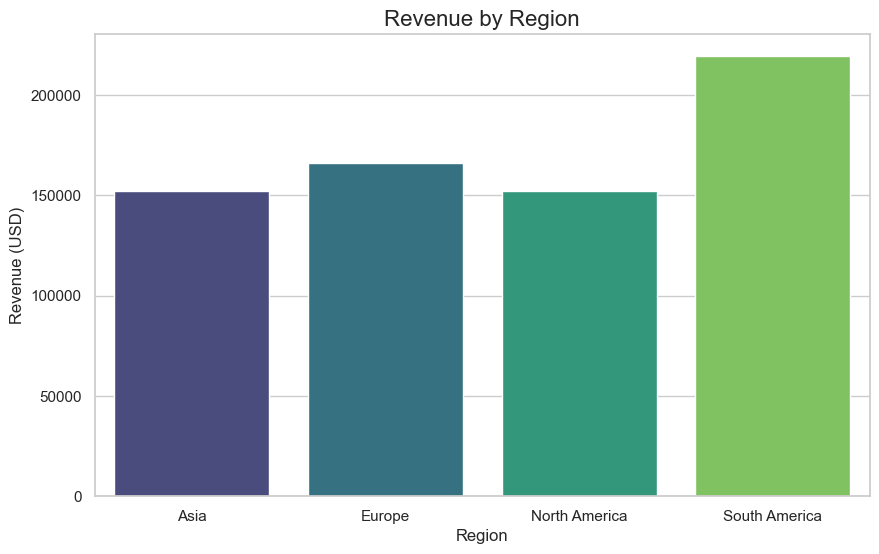

C:\Users\HP\AppData\Local\Temp\ipykernel_15140\529475378.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="magma")


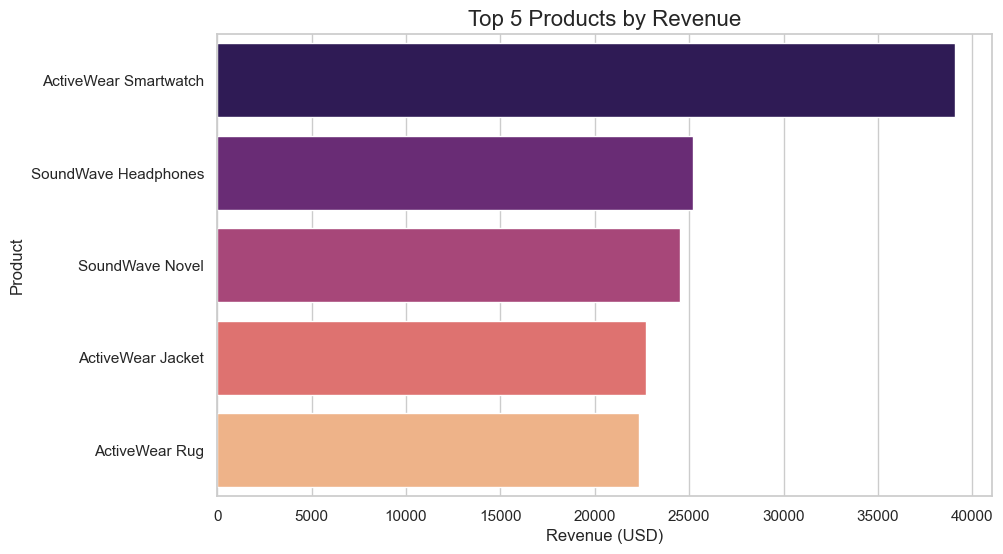

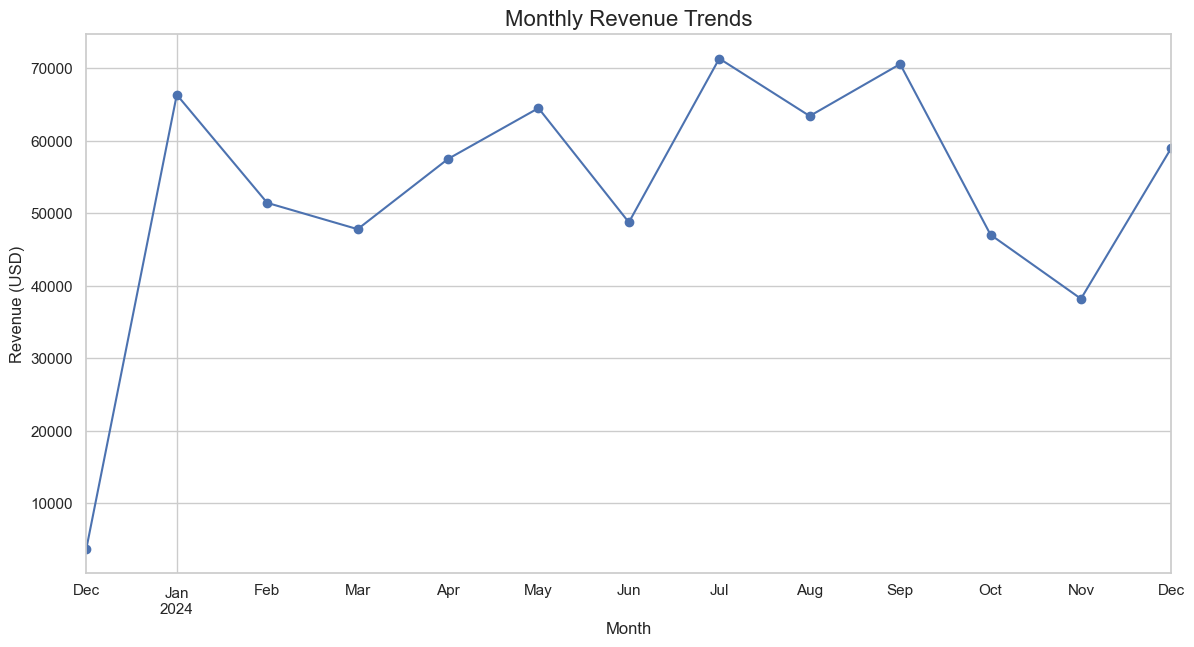

C:\Users\HP\AppData\Local\Temp\ipykernel_15140\529475378.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_categories.values, y=popular_categories.index, palette="cool")


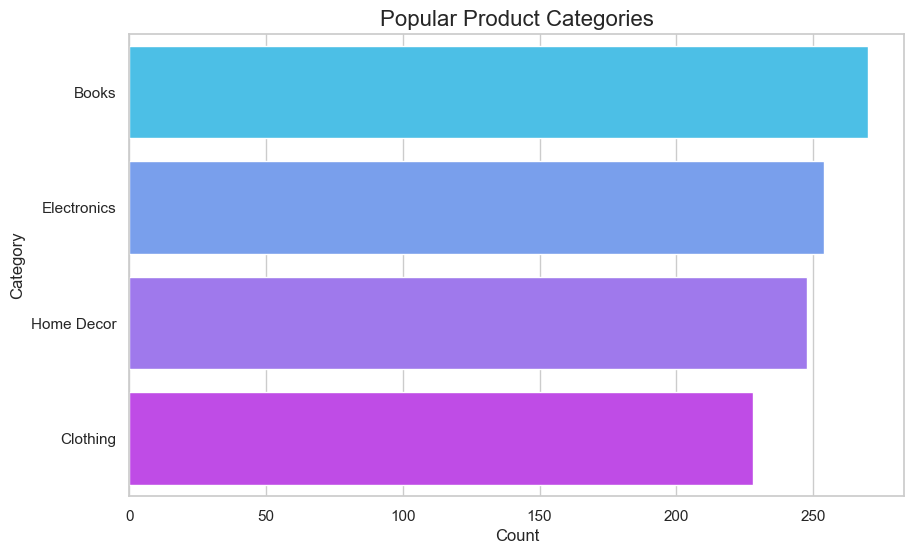

In [14]:
# Visualization
sns.set_theme(style="whitegrid")

# Revenue by Region
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_region.index, y=revenue_by_region.values, palette="viridis")
plt.title("Revenue by Region", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Revenue (USD)", fontsize=12)
plt.show()

# Top 5 Products by Revenue
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="magma")
plt.title("Top 5 Products by Revenue", fontsize=16)
plt.xlabel("Revenue (USD)", fontsize=12)
plt.ylabel("Product", fontsize=12)
plt.show()

# Monthly Revenue Trend
plt.figure(figsize=(14, 7))
monthly_revenue.plot(marker='o')
plt.title("Monthly Revenue Trends", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue (USD)", fontsize=12)
plt.grid(True)
plt.show()

# Popular Product Categories
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_categories.values, y=popular_categories.index, palette="cool")
plt.title("Popular Product Categories", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.show()